<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab09_Earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 9: Analyzing the Mexico City Earthquake of 1985

*written by Rose Finn*

*Adapted from RPI CIVL-6490 (M. Symans) with the help of Edward Schauffert*

## Overview

As we discussed in class, the 1985 earthquake in Mexico City was devasting. The epicenter of the earthquake was almost 300 km away, but the soil conditions near Mexico City amplified the seismic waves.

The earthquake was particularly damaging for buildings with heights between 6-15 stories.  Most of the buildings in this size range actually collapsed, while shorter and taller buildings were damaged but didn't collapse.

The goal of this lab is to analyze the seismic data taken in Mexico City at the time of the earthquake.  We will compute the Fourier transform to determine the dominant frequencies in the surface waves.  We will compare these frequencies to the natural frequencies of buildlings so that we can understand why the 6-15 story buildings were so badly damaged.  

Using this information, you will need to make recommendations for changes in the building code to improve the safety of future structures that are built in the vicinity of Mexico City.





## Part 0: Review of Discrete Fourier Transforms

### Definitions

The amplitude of displacement or intensity versus time is called the time-domain data.

* $y(t)$ = time-domain data
* N = number of points in $y(t)$
* $\Delta t$ = time step of $y(t)$

The maximum frequency $f_{max}$ that can be contained in $y(t)$ is the inverse of the time step.

* $f_{max} = 1/\Delta t$

The maximum measurable frequency is called the Nyquist frequency, $f_{Nyquist}$.  The Nyquist frequency is half the maximum frequency:

* $f_{Nyquist} = f_{max}/2$

The smallest frequency present in $y(t)$ is known as the frequency step, $\Delta f$.  If is equal to the maximum frequency divided by the number of points in $y(t)$:

* $\Delta f = f_{max}/N$

### Generating the Fourier Spectrum

The Fourier transform can be obtained using the `fft` function in the `np.fft` module.  The result will be a complex vector of length N.


```Y(f)  = fft(y(t))```

* To get the Fourier spectrum, take the absolute value of $Y(f)$ to get the amplitude.
* If you plot the result over a frequency range from $\Delta f$ to $f_{max}$, you will see that the spectrum is symmetric about the Nyquist frequency.  The high frequency does not contain any new information, and so we generally just plot the Fourier spectrum over a frequency range from $\Delta f$ to $f_{Nyquist}$.

```frequencies = np.arange(1,N+1)*df  ```

* You will sometimes see that people plot the Fourier amplitudes `np.abs(Y)` divided by the number of data points, $N$, so that the values are not too large.


In [1]:
# import numpy, pyplot
import numpy as np
import matplotlib.pyplot as plt


## Part 1: Earthquakes from 1984-1986

I have placed a datafile at https://facultyweb.siena.edu/~rfinn/teaching/phys250/earthquakes-1984-1986.csv that contains information on earthquakes that occurred from 1984 through 1986.  The file contains all earthquakes with magnitudes greater than 2.5.


### Downloading the data

* use wget to bring the data into your google drive folder
* read in the data file using a module of your choice (e.g. numpy.loadtxt, pandas, astropy.table)

```
from astropy.table import Table
equakes = Table.read('earthquakes-1984-1986.csv')
```
* print out the table so you can see what columns are in it

In [2]:
# your code here to pull file with wget
from astropy.table import Table
!wget https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Ffacultyweb.siena.edu%2F%7Erfinn%2Fteaching%2Fphys250%2Fearthquakes-1984-1986.csv


--2024-04-03 19:54:17--  https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Ffacultyweb.siena.edu%2F%7Erfinn%2Fteaching%2Fphys250%2Fearthquakes-1984-1986.csv
Resolving colab.research.google.com (colab.research.google.com)... 216.239.38.180, 216.239.36.180, 216.239.34.180, ...
Connecting to colab.research.google.com (colab.research.google.com)|216.239.38.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘corgiredirector?site=https:%2F%2Ffacultyweb.siena.edu%2F~rfinn%2Fteaching%2Fphys250%2Fearthquakes-1984-1986.csv.3’

corgiredirector?sit     [ <=>                ]  68.14K  --.-KB/s    in 0.005s  

2024-04-03 19:54:18 (14.1 MB/s) - ‘corgiredirector?site=https:%2F%2Ffacultyweb.siena.edu%2F~rfinn%2Fteaching%2Fphys250%2Fearthquakes-1984-1986.csv.3’ saved [69772]



In [3]:
# your code to read in the file
equakes = Table.read('earthquakes-1984-1986.csv')
equakes

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
str24,float64,float64,float64,float64,str5,int64,float64,float64,float64,str6,str12,str24,str65,str17,float64,float64,float64,int64,str8,str6,str6
1985-12-31T23:54:31.490Z,14.303,-60.173,33.0,3.8,ml,--,--,--,0.4,us,usp0002pnc,2014-11-07T00:37:41.716Z,"76 km ESE of Le Vauclin, Martinique",earthquake,--,--,--,--,reviewed,us,mgg
1985-12-31T23:48:14.550Z,42.355,19.879,10.0,3.0,md,--,--,--,0.6,us,usp0002pnb,2014-11-07T00:37:41.715Z,"23 km S of Gusinje, Montenegro",earthquake,--,--,--,--,reviewed,us,ttg
1985-12-31T23:35:34.080Z,19.4253333,-155.3191667,3.369,3.3,ml,45,65.0,--,0.12,hv,hv19852029,2020-03-31T21:58:50.160Z,"9 km WSW of Volcano, Hawaii",earthquake,0.31,0.79,0.03,2,reviewed,hv,hv
1985-12-31T23:21:09.590Z,20.4365,-156.089,26.439,2.96,ml,45,166.0,--,0.13,hv,hv19852028,2020-03-31T21:58:49.850Z,"Maui region, Hawaii",earthquake,1.11,1.87,0.12,5,reviewed,hv,hv
1985-12-31T22:56:33.100Z,5.534,126.306,125.6,4.9,mb,--,--,--,1.2,us,usp0002pn9,2014-11-07T00:37:41.710Z,"85 km ESE of Caburan, Philippines",earthquake,--,19.3,--,12,reviewed,us,us
1985-12-31T22:07:20.950Z,19.426,-155.323,2.749,2.67,ml,35,38.0,--,0.12,hv,hv19852026,2020-03-31T21:58:49.150Z,"9 km W of Volcano, Hawaii",earthquake,0.31,0.73,0.22,2,reviewed,hv,hv
1985-12-31T21:45:25.000Z,50.244,12.433,10.0,2.6,ml,--,--,--,0.2,us,usp0002pn8,2014-11-07T00:37:41.708Z,"2 km ESE of Luby, Czechia",earthquake,--,--,--,--,reviewed,us,grf
1985-12-31T21:32:10.360Z,44.6041667,-110.991,8.66,2.51,md,11,88.0,0.07847,0.1,uu,uu50027950,2018-08-28T03:23:08.610Z,"11 km SE of West Yellowstone, Montana",earthquake,0.43,0.92,--,9,reviewed,uu,uu
1985-12-31T20:25:01.620Z,5.929,-73.524,156.9,4.4,mb,--,--,--,0.9,us,usp0002pn7,2014-11-07T00:37:41.705Z,"1 km WSW of Togüí, Colombia",earthquake,--,6.6,--,1,reviewed,us,us


### Visualizing the data

(5 points)

Make a plot of the latitude vs. longitude of the earthquakes using `plt.scatter`, and scale the size of the points by the magnitude of the earthquakes

**QUESTION**

What can you conclude about the positions of the earthquakes on the surface of the Earth?  Are the earthquakes distributed evenly across the surface?  Explain.
**Most of the earthquakes appear to be along the edges of the continents, forming what is a rough outline of a map. As for the distribution, definitely more dense in certain areas as opposed to others, again, mostly on the boundaries of a continent / country.**


Text(0, 0.5, 'Latitude (degrees)')

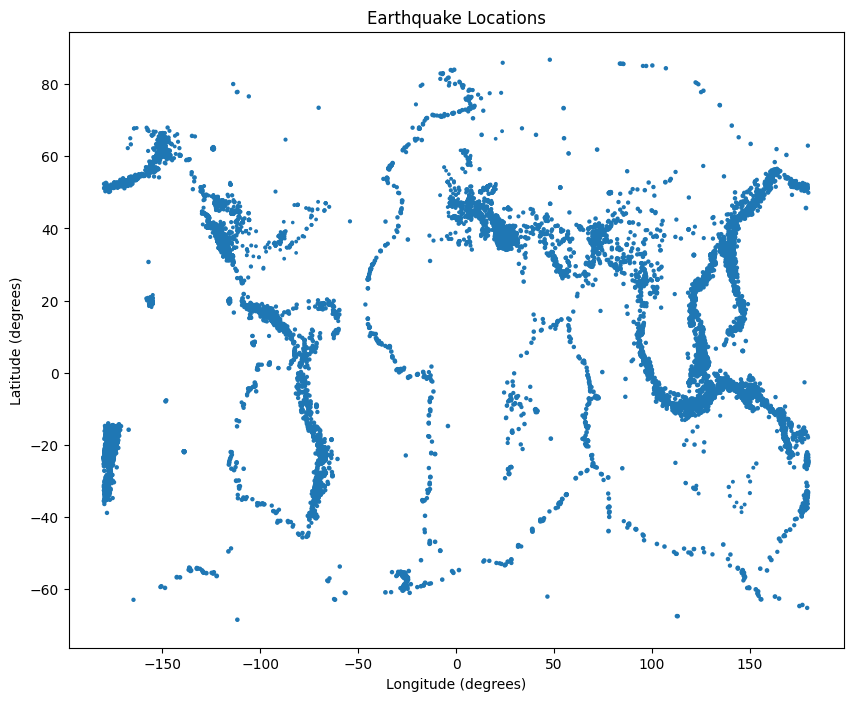

In [4]:
# your code here
equakes_lat = equakes['latitude']
equakes_long = equakes['longitude']

plt.figure(figsize=(10,8))

plt.scatter(equakes_long, equakes_lat, s=equakes['mag'])
plt.title('Earthquake Locations')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

### Show the distribution of magnitudes

(5 points)

* Create a histogram of the magnitudes of the earthquakes using `plt.hist`.
* Create an array to use for the histogram bins, and let the array range from 2 to 8.5 in steps of 0.5:
```mybins = np.arange(2,9,0.5)```
* You can require `plt.hist` to use these bins by invoking the optional argument: `bins=mybins`.
* Set the y axis to log scale using the command: `plt.yscale('log')`

**QUESTION**

The Mexico City earthquake had a magnitude of 8.  How common are earthquakes of this intensity?

To answer this quantitatively, calculate the fraction of all earthquakes with $mag > 2.5$ that have a magnitude equal to 8.

**Experiencing a magnitude 8 earthquake is not very common. Out of all of the earthquakes with at least a magnitude of 2.5, that being 19358 earthquakes, the number of magnitude 8 earthquakes is 2, making that 0.01% of all earthquakes.**

Text(0, 0.5, 'Number of Earthquakes')

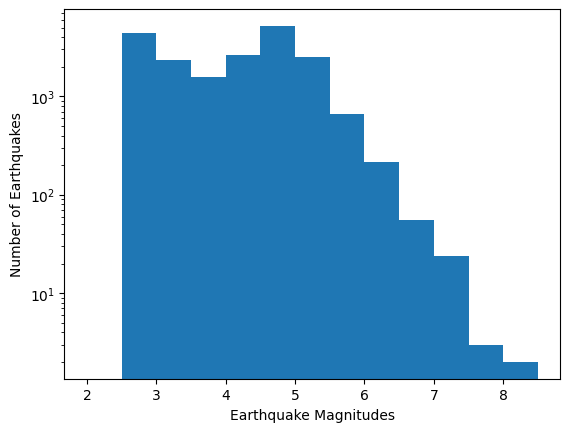

In [60]:
# plot histogram of magnitudes
mybins =  np.arange(2,9,0.5)
plt.hist(equakes['mag'], bins = mybins)
plt.yscale('log')
plt.xlabel('Earthquake Magnitudes')
plt.ylabel('Number of Earthquakes')

In [6]:
Eqmags = equakes['mag']
all_eq_mag = Eqmags > 2.5
Eqmags[all_eq_mag]
mag_eight = Eqmags[all_eq_mag] == 8
Eqmags[all_eq_mag][mag_eight]

fraction = len(Eqmags[all_eq_mag][mag_eight]) / len(Eqmags[all_eq_mag])
fraction*100 #percentage

0.010331645831180907

## Part 2: Analyze the Seismic Waves

* I have put a csv file at https://facultyweb.siena.edu/~rfinn/teaching/phys250/mex1985_waveform.csv
* The file contains data from a seismograph that was located in Mexico City at the time of the earthquake.

* The csv file has 5 columns:
  * n = measurement number
  * time of measurement
  * acceleration
  * velocity
  * displacement

* Download the csv file and read it into python. Again, you can use `Table` from `astropy.table` to read in the file.



In [7]:
# your code to grab the file using wget
!wget  https://facultyweb.siena.edu/~rfinn/teaching/phys250/mex1985_waveform.csv


--2024-04-03 19:54:23--  https://facultyweb.siena.edu/~rfinn/teaching/phys250/mex1985_waveform.csv
Resolving facultyweb.siena.edu (facultyweb.siena.edu)... 199.223.246.240
Connecting to facultyweb.siena.edu (facultyweb.siena.edu)|199.223.246.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 724361 (707K) [text/csv]
Saving to: ‘mex1985_waveform.csv.2’

mex1985_waveform.cs 100%[===================>] 707.38K  --.-KB/s    in 0.1s    

2024-04-03 19:54:23 (6.50 MB/s) - ‘mex1985_waveform.csv.2’ saved [724361/724361]



In [8]:
# your code to read in the file use Table.read
mex1985 = Table.read('mex1985_waveform.csv')
# print the table so you can see the names of the columns
mex1985

n,time,accel,vel,displ
int64,float64,float64,float64,float64
1,0.0,3.0799999237060547,0.30000001192092896,-0.07500000298023224
2,0.019999999552965164,1.593999981880188,0.34599998593330383,-0.06800000369548798
3,0.03999999910593033,0.9430000185966492,0.36899998784065247,-0.05999999865889549
4,0.05999999865889549,0.718999981880188,0.3869999945163727,-0.052000001072883606
5,0.07999999821186066,-0.07199999690055847,0.39399999380111694,-0.04399999976158142
6,0.10000000149011612,-0.008999999612569809,0.39399999380111694,-0.035999998450279236
7,0.11999999731779099,0.03099999949336052,0.39399999380111694,-0.02800000086426735
8,0.14000000059604645,-0.0020000000949949026,0.39399999380111694,-0.019999999552965164
9,0.1599999964237213,0.03400000184774399,0.39399999380111694,-0.012000000104308128


### Plot the Time Series Data

(5 points)

* Plot the amplitude of acceleration, velocity, and displacement versus time in a plot with 3 rows and 1 column.  

* NOTE: The acceleration is in units of cm/s$^2$, the velocity is in units of cm/s, and the displacement is in units of cm.

**QUESTION**

Can you notice any oscillations in the time series data?  If so, what is the approximate period of the oscillations? **There are noticeable oscillations, though the exact period is hard to tell precisly as there are many different waves involved.**


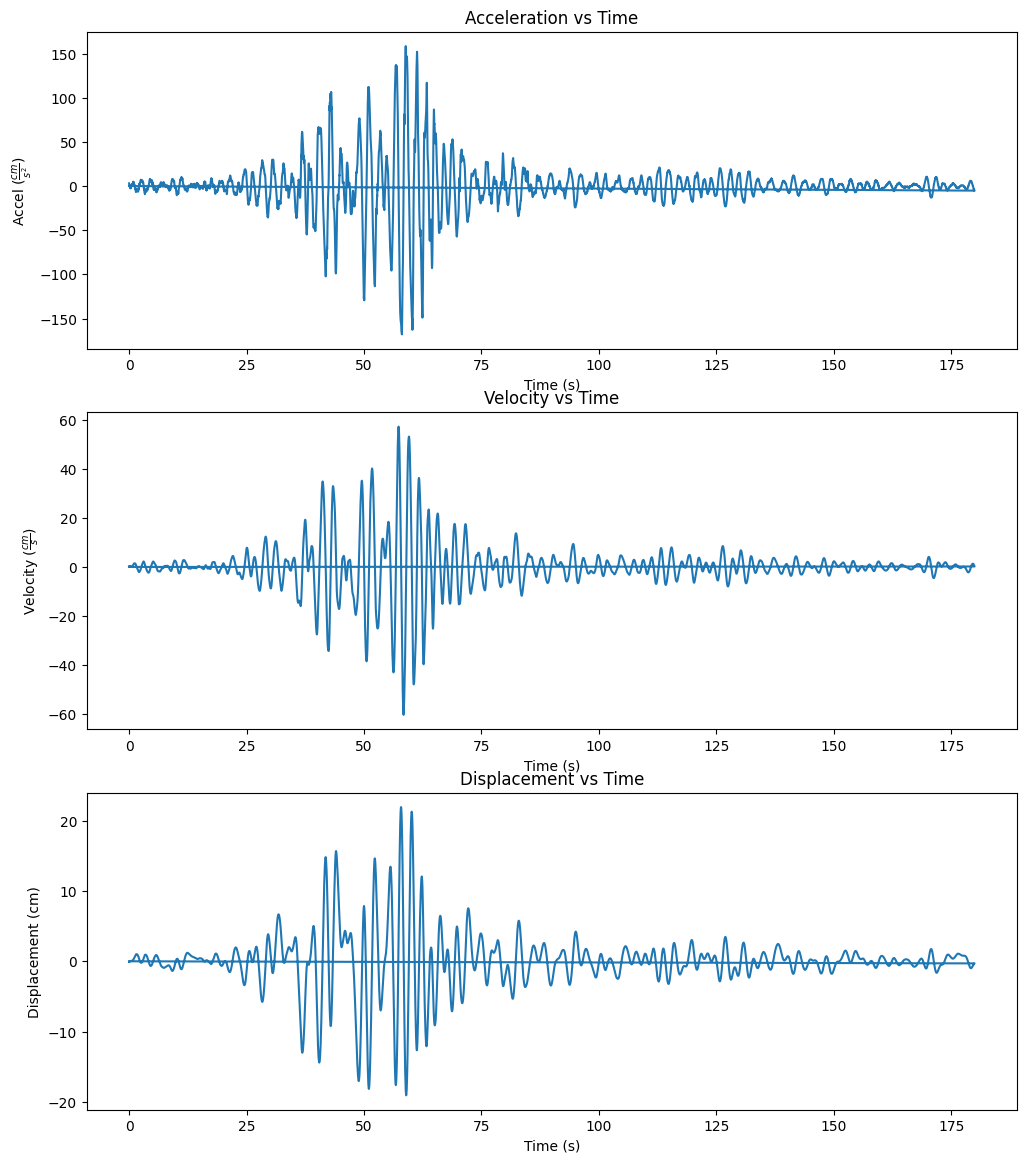

In [9]:
# plot the amplitude of acceleration, velocity, and displacement versus time
eq_accel = mex1985['accel']
eq_vel = mex1985['vel']
eq_displ = mex1985['displ']
eq_time = mex1985['time']

plt.figure(figsize = (12,14))

# Acceleration
plt.subplot(3,1,1)
plt.title('Acceleration vs Time')
plt.xlabel('Time (s)')
plt.ylabel(r'Accel $(\frac{cm}{s^2})$')
plt.plot(eq_time,eq_accel)

# Velocity
plt.subplot(3,1,2)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel(r'Velocity $(\frac{cm}{s})$')
plt.plot(eq_time,eq_vel)

# Displacement
plt.subplot(3,1,3)
plt.title('Displacement vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.plot(eq_time,eq_displ)

### Determine the Frequency Spectrum of the Seismic Data

(5 points)

* Plot the Fourier spectrum of the acceleration, velocity, and displacement data using `fft` function from the `np.fft` module.
* Use the subplot command to create figure with 3 rows and 1 column.
* Make one version of the plot where the frequency axis extends to the Nyquist frequency (`frequency[0:N//2+1]`), and a second version of the plot that focuses in on the dominant frequencies (you can use `plt.xlim(xmin,xmax)` for this).

**QUESTIONS**
1. At what frequency is the amplitude maximum?  Over what range in frequencies does the Fourier spectrum show large amplitudes? **The maximum amplitude for the acceleration is 60595. These frequencies range from about 0 seconds to 0.6 seconds, afterwhich it dies down significantly.**
1. Are the frequencies the same for the acceleration, velocity, and displacement data? **No, the frequencies vary slightly between each plot, but they are similar.**
2. Convert the range of dominant frequencies of the acceleration into a corresponding range in periods, where $f = 1/T$. **Range is from 1.51 seconds to about 3.16 seconds.**



In [10]:
# your code to calculate fft here
from numpy.fft import rfft

In [14]:
taccel = np.abs(rfft(eq_accel))
tvel = np.abs(rfft(eq_vel))
tdis = np.abs(rfft(eq_displ))

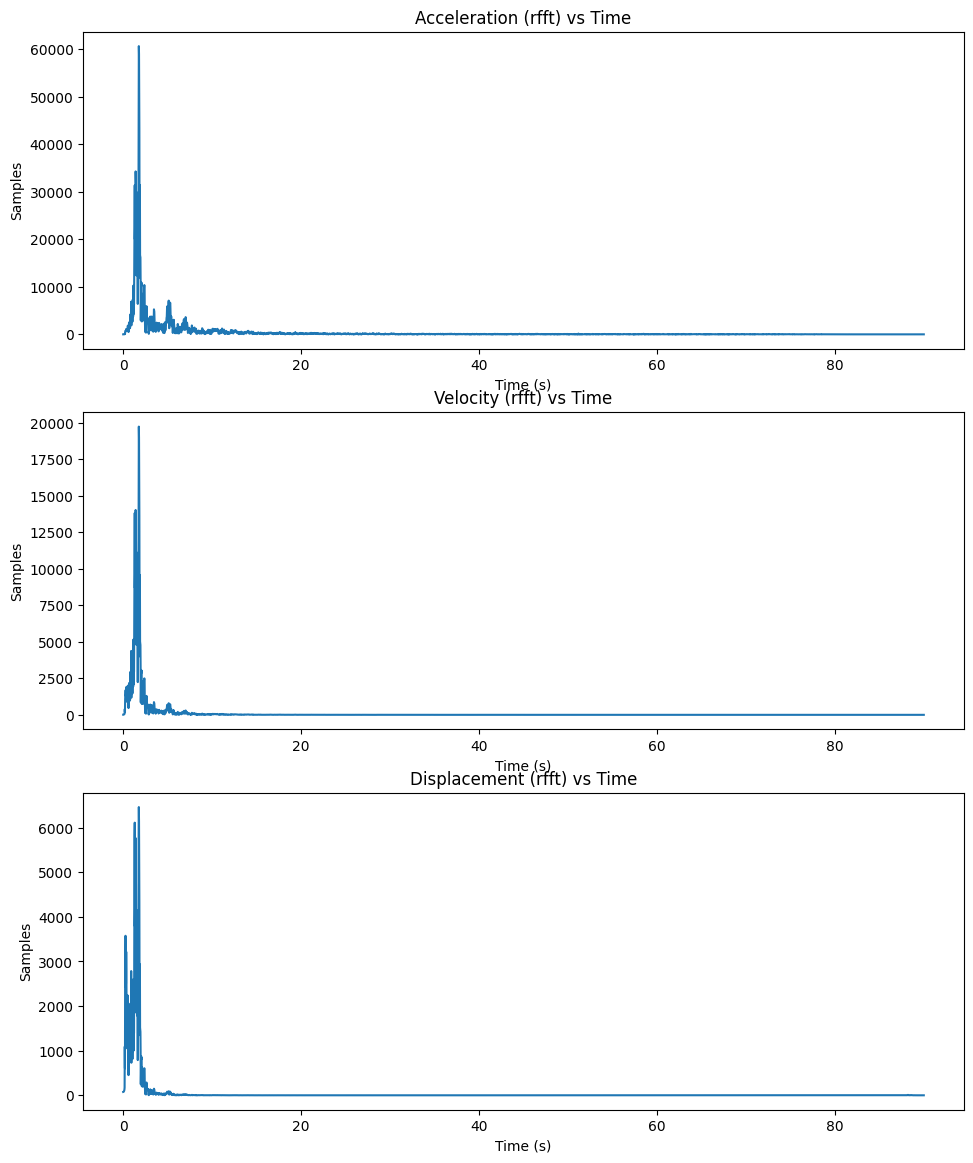

In [62]:
# your code to plot the results here for frequencies up to the Nyquist frequency
plt.figure(figsize=(25,14))
# Acceleration
plt.subplot(3,2,1)
plt.title('Acceleration (rfft) vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Samples')
#plt.xlim(0,2.5)
plt.plot(eq_time[0:len(eq_time)//2+1],taccel[0:len(eq_time)//2+1])


# Velocity
plt.subplot(3,2,3)
plt.title('Velocity (rfft) vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Samples')
#plt.xlim(0,2.5)
plt.plot(eq_time[0:len(eq_time)//2+1],tvel[0:len(eq_time)//2+1])

# Displacement
plt.subplot(3,2,5)
plt.title('Displacement (rfft) vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Samples')
#plt.xlim(0,2.5)
plt.plot(eq_time[0:len(eq_time)//2+1],tdis[0:len(eq_time)//2+1])



In [61]:
# your code to plot the results here for the frequency range where the amplitudes are large
rYa = rfft(mex1985['accel'])
rYv = rfft(mex1985['vel'])
rYd = rfft(mex1985['displ'])

N = len(mex1985['time'])
dt = mex1985['time'][1]-mex1985['time'][0]
fmax = 1/dt

frequency = np.fft.rfftfreq(len(mex1985),d=1/fmax)



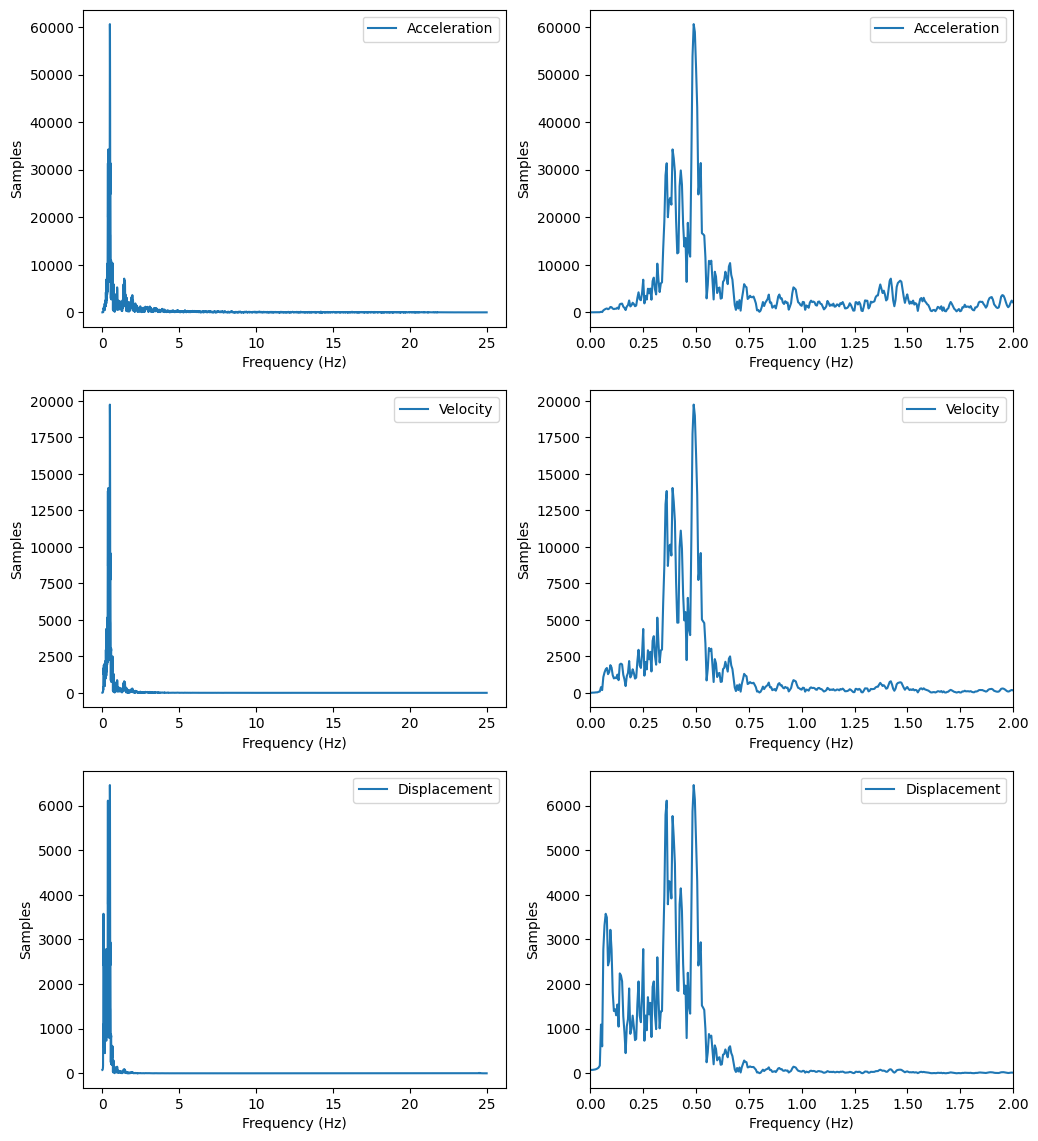

In [47]:
plt.figure(figsize=(12,14))

plt.subplot(3,2,1)
plt.plot(frequency, np.abs(rYa),label='Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Samples')
plt.legend()

plt.subplot(3,2,3)
plt.plot(frequency, np.abs(rYv),label='Velocity')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Samples')
plt.legend()

plt.subplot(3,2,5)
plt.plot(frequency, np.abs(rYd),label='Displacement')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Samples')
plt.legend()

plt.subplot(3,2,2)
plt.plot(frequency, np.abs(rYa),label='Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Samples')
plt.xlim(0,2)
plt.legend()

plt.subplot(3,2,4)
plt.plot(frequency, np.abs(rYv),label='Velocity')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Samples')
plt.xlim(0,2)
plt.legend()

plt.subplot(3,2,6)
plt.plot(frequency, np.abs(rYd),label='Displacement')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Samples')
plt.xlim(0,2)
plt.legend()

In [78]:
varia=[]
for i in range(len(taccel)):
  if taccel[i]>= 10000:
    varia.append(True)
  else:
    varia.append(False)
range1 = 1/min(frequency[varia])
range2 = 1/max(frequency[varia])
print(range1,range2)

3.159999929368496 1.5136134115462543


## Part 3: Recommending Changes in Construction Practices

(5 points)

The scaling relation between resonant frequency/period and the number of stories in a building is:

$$ f_0 = \frac{10}{N_{stories}} $$

or

$$ T_0 = 0.1 N_{stories} $$


As a structural engineer, you want to avoid building structures that will resonate at the frequencies associated with the earthquake waves.

**QUESTIONS**

1. Based on this, what size buildings would resonate if another similar earthquake struck near Mexico City? **A building that has  about 20 stories would resonate heavily during an earthquake.**

1. What changes, if any, would you recommend to the building code regarding the construction of new multistory buildings? Justify your response. **I would recommend that the building would end up being greater than 20 stories to reduce the chance of resonance. Otherwise build them using a lot of reinforcements and use techniques to reduce shaking resistance between the foundation and the Earth.**


In [59]:
rya_val = rYa == max(rYa)
N_s = 10 / frequency[rya_val]
N_s

array([20.46818136])

## Part 4: Summarize Your Results

(5 points)

Create a brief (2 slides) presentation that includes the following:
* provide context - why are we analyzing the seismic data from the Mexico City earthquake?
* summarize what you did, including the data that you used
* summarize what you found
* make recommendations for any adjustments to the builing code for Mexico City and the surrounding area




## References

* The seismic data come from https://www.strongmotioncenter.org/vdc/scripts/event.plx?evt=125

* Symans, M. 2009, Homework 2, Problem 2, CIVL 6490
* Wikipedia, https://en.wikipedia.org/wiki/1985_Mexico_City_earthquake